# Pore scan POD5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pod5 as p5
import seaborn as sns
sns.set_context("notebook", rc={"figure.figsize": (20, 10)})

In [2]:
def spectrum(signal):
    # fs = 5000
    
    # # Compute the FFT
    # fft_result = np.fft.rfft(signal)
    # frequencies = np.fft.rfftfreq(len(signal), d=1/fs)  # Frequency bins
    
    # # Compute the magnitude spectrum
    # magnitude = np.abs(fft_result)

    # return magnitude
    return np.abs(np.fft.rfft(signal))

def process_sample(input_paths, squeel=1500):
    # reads = []
    # for input_path in input_paths:
    #     with p5.Reader(input_path) as reader:
    #         for i, read_record in enumerate(reader.reads()):
    #             reads.append([read_record.read_id, read_record.signal, read_record.run_info])
    # # sizes = [len(r[1]) for r in reads]  # if len(r[1]) <= 60000]
    # # print(len(sizes))
    # # sns.histplot(sizes, bins=100)
    # spectra = [spectrum(r[1]) for r in reads]
    # print(min(len(s) for s in spectra))
    # spectra_extra = [s[:squeel] for s in spectra]
    # return spectra_extra
    # # df = pd.DataFrame([{'x': i, 'y': s[i]} for i in range(squeel) for s in spectra_extra])
    # # cond = df['x'].isin([300, 600, 900, 1200])
    # # # cond &= (df['x'] / 23) == 0
    # # sns.boxplot(data=df[cond], x='x', y='y')
    spectra = []
    for input_path in input_paths:
        with p5.Reader(input_path) as reader:
            for read_record in reader.reads():
                spectra.append(spectrum(read_record.signal)[:squeel])
    return spectra

In [3]:
input_paths = [
    '/opt/data/pore_scan/AVY051_d1a579dc_dcf30013_0.pod5',
    '/opt/data/pore_scan/AVY051_d1a579dc_dcf30013_1.pod5',
    '/opt/data/pore_scan/AVY051_d1a579dc_dcf30013_2.pod5',
    '/opt/data/pore_scan/AVY051_d1a579dc_dcf30013_3.pod5',
]
spectra000 = process_sample(input_paths, 1500)

In [4]:
input_paths = [
    '/opt/data/pore_scan/AVM281_df682c33_49d6f77e_0.pod5',
    '/opt/data/pore_scan/AVM281_df682c33_49d6f77e_1.pod5',
    '/opt/data/pore_scan/AVM281_df682c33_49d6f77e_2.pod5',
    '/opt/data/pore_scan/AVM281_df682c33_49d6f77e_3.pod5',
]
spectra025 = process_sample(input_paths, 1500)

In [5]:
input_paths = [
    '/opt/data/pore_scan/AVN323_029d6725_8e1500a2_0.pod5',
    '/opt/data/pore_scan/AVN323_029d6725_8e1500a2_1.pod5',
    '/opt/data/pore_scan/AVN323_029d6725_8e1500a2_2.pod5',
    '/opt/data/pore_scan/AVN323_029d6725_8e1500a2_3.pod5',
]
spectra100 = process_sample(input_paths, 1500)

In [10]:
min([len(s) for s in spectra000])

1500

In [11]:
min([len(s) for s in spectra025])

1500

In [12]:
min([len(s) for s in spectra100])

1500

In [9]:
stop

NameError: name 'stop' is not defined

In [13]:
medians000 = np.nanmedian(np.stack(spectra000, axis=0), axis=0)

In [14]:
medians025 = np.nanmedian(np.stack(spectra025, axis=0), axis=0)

In [15]:
medians100 = np.nanmedian(np.stack(spectra100, axis=0), axis=0)

In [16]:
medians000[:5]

array([22964311.        ,   166485.53795008,   138176.34513724,
         140504.82263859,   133528.99051542])

In [17]:
medians025[:5]

array([20382276.        ,   161790.96057427,   141136.15035191,
         140602.12993759,   134400.03971056])

In [18]:
medians100[:5]

array([17857206.        ,   169075.29001005,   137180.93582598,
         145345.00907219,   135509.39638854])

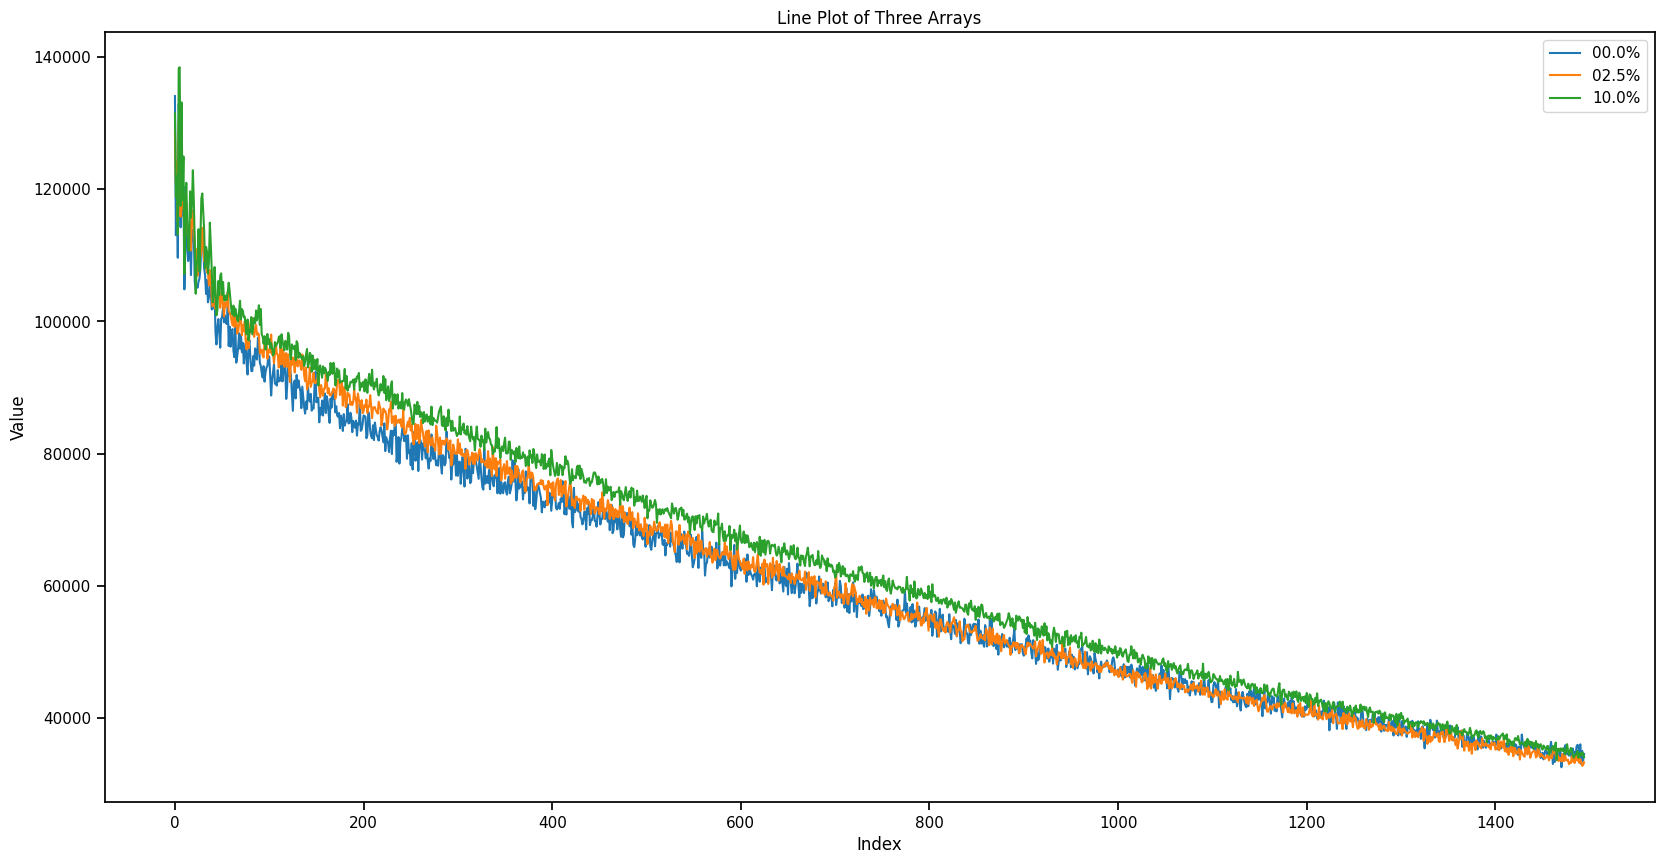

In [22]:
plt.figure(figsize=(20, 10))

# Create a shared x-axis
x = np.arange(1495)

# Plot the arrays
plt.plot(x, medians000[5:], label="00.0%")
plt.plot(x, medians025[5:], label="02.5%")
plt.plot(x, medians100[5:], label="10.0%")

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Plot of Three Arrays")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [24]:
m100 = medians100 - medians000
m025 = medians025 - medians000

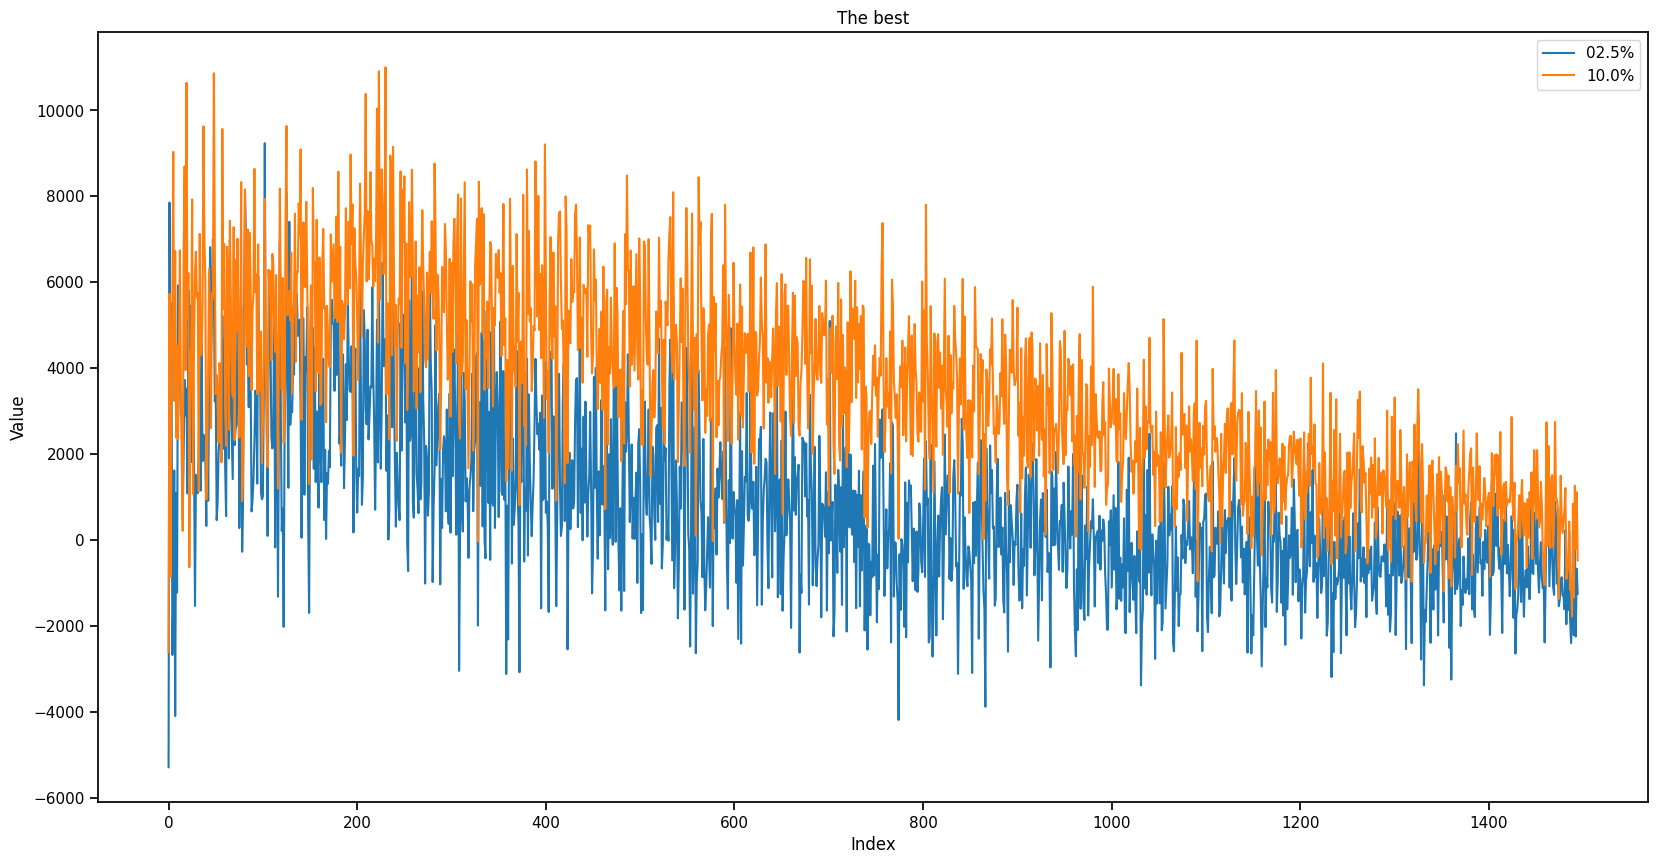

In [25]:
plt.figure(figsize=(20, 10))

# Create a shared x-axis
x = np.arange(1495)

# Plot the arrays
plt.plot(x, m025[5:], label="02.5%")
plt.plot(x, m100[5:], label="10.0%")

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("The best")

# Add a legend
plt.legend()

# Show the plot
plt.show()